---

# Purpose

---

1. Read-in massive temperature-only dataset (temp-1)

<br>

---
## Read In Data
---

In [1]:
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

<IPython.core.display.Javascript object>

In [2]:
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [3]:
import os
import sys
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import numpy as np
import warnings
#warnings.filterwarnings("ignore", category=UserWarning)
#warnings.filterwarnings("ignore", category=DeprecationWarning)
import warnings
warnings.filterwarnings("ignore")
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

C:\Users\tbresee\AppData\Roaming\Python\Python38\site-packages\mpl_toolkits\mplot3d\__init__.py:1: MatplotlibDeprecationWarning: 
The deprecated function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  from .axes3d import Axes3D


In [4]:
os.getcwd()

'D:\\GITHUB_Repos\\SensorAnalysis\\ENTER\\code\\analyzing_temperature_only'

In [5]:
os.chdir('D:\\AOT_TEMPERATURE_ONLY_DATASET\\AoT_Chicago.complete.temp1')
# within this folder we keep the data.csv file we require 

All of the data files:

In [6]:
!dir

 Volume in drive D is New Volume
 Volume Serial Number is A060-E317

 Directory of D:\AOT_TEMPERATURE_ONLY_DATASET\AoT_Chicago.complete.temp1

09/21/2021  04:54 PM    <DIR>          .
09/21/2021  04:54 PM    <DIR>          ..
09/07/2021  01:20 PM     8,602,204,160 data.csv
09/07/2021  01:20 PM       682,117,243 data.csv.gz
08/17/2021  11:02 AM            16,268 nodes.csv
08/17/2021  11:02 AM            39,059 offsets.csv
08/17/2021  11:02 AM               263 provenance.csv
08/17/2021  11:02 AM             6,826 README.md
08/17/2021  11:02 AM            27,300 sensors.csv
               7 File(s)  9,284,411,119 bytes
               2 Dir(s)  913,244,663,808 bytes free


In [7]:

# this is a very large file, like over 8GB in size...

df = pd.read_csv('data.csv', 
                 parse_dates=['data.csv'], 
                 index_col='data.csv')


In [8]:
df.head()

,node_id,subsystem,sensor,parameter,value_raw,value_hrf
data.csv,,,,,,
2018-01-01 00:00:06,001e0610e532,metsense,pr103j2,temperature,458.0,-10.90
2018-01-01 00:00:07,001e0610bc07,metsense,pr103j2,temperature,470.0,-10.00
2018-01-01 00:00:07,001e0610ef27,metsense,pr103j2,temperature,459.0,-10.80
2018-01-01 00:00:08,001e0610e540,metsense,pr103j2,temperature,454.0,-11.15
2018-01-01 00:00:08,001e0610ee61,metsense,pr103j2,temperature,451.0,-11.40


In [9]:
df.drop('value_raw', axis=1, inplace=True)  # value_hrf is what we want 

In [10]:
df.index.names = ["timestamp"]

In [11]:
df.head()

,node_id,subsystem,sensor,parameter,value_hrf
timestamp,,,,,
2018-01-01 00:00:06,001e0610e532,metsense,pr103j2,temperature,-10.90
2018-01-01 00:00:07,001e0610bc07,metsense,pr103j2,temperature,-10.00
2018-01-01 00:00:07,001e0610ef27,metsense,pr103j2,temperature,-10.80
2018-01-01 00:00:08,001e0610e540,metsense,pr103j2,temperature,-11.15
2018-01-01 00:00:08,001e0610ee61,metsense,pr103j2,temperature,-11.40


In [12]:
df['node_id'] = df['node_id'].astype('category')
df['subsystem'] = df['subsystem'].astype('category')
df['sensor'] = df['sensor'].astype('category')
df['parameter'] = df['parameter'].astype('category')

In [13]:
df.dtypes

node_id      category
subsystem    category
sensor       category
parameter    category
value_hrf     float64
dtype: object

In [14]:
df.isnull().sum()

node_id      1
subsystem    1
sensor       1
parameter    1
value_hrf    1
dtype: int64

In [15]:
# the specific rows with missing data, you can delete manually...
df.loc[df.isnull().any(axis=1)]

,node_id,subsystem,sensor,parameter,value_hrf
timestamp,,,,,
NaT,NaN,NaN,NaN,NaN,NaN


In [16]:
df.tail(1)

,node_id,subsystem,sensor,parameter,value_hrf
timestamp,,,,,
NaT,NaN,NaN,NaN,NaN,NaN


In [17]:
# Drop last row
df.drop(index=df.index[-1], 
        axis=0, 
        inplace=True)

In [18]:
df.tail(1)

,node_id,subsystem,sensor,parameter,value_hrf
timestamp,,,,,
2021-01-21 04:06:22,001e0611804d,metsense,pr103j2,temperature,1.85


In [19]:
df.isnull().sum()

node_id      0
subsystem    0
sensor       0
parameter    0
value_hrf    0
dtype: int64

In [20]:
# we are now good 

In [21]:
df.head()

,node_id,subsystem,sensor,parameter,value_hrf
timestamp,,,,,
2018-01-01 00:00:06,001e0610e532,metsense,pr103j2,temperature,-10.90
2018-01-01 00:00:07,001e0610bc07,metsense,pr103j2,temperature,-10.00
2018-01-01 00:00:07,001e0610ef27,metsense,pr103j2,temperature,-10.80
2018-01-01 00:00:08,001e0610e540,metsense,pr103j2,temperature,-11.15
2018-01-01 00:00:08,001e0610ee61,metsense,pr103j2,temperature,-11.40


In [22]:
len(df) # 120 844 393

120844393

In [23]:
df.describe()

,value_hrf
count,1.208444e+08
mean,1.391998e+01
std,1.159312e+01
min,-3.995000e+01
25%,4.200000e+00
50%,1.380000e+01
75%,2.430000e+01
max,4.990000e+01


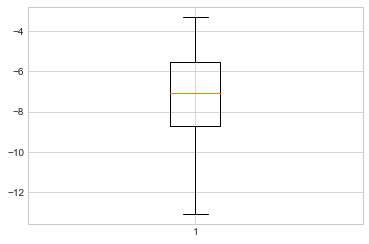

In [24]:
plt.boxplot(df.loc['2019-01-29':'2019-01-30'][:300].value_hrf); 

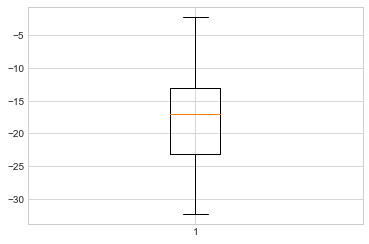

In [25]:
plt.boxplot(df.loc['2019-01-29':'2019-01-30'].value_hrf); 

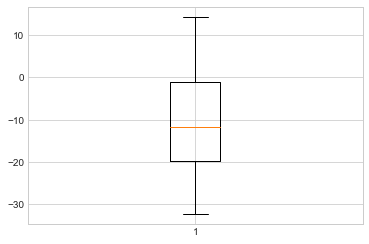

In [26]:
plt.boxplot(df.loc['2019-01-29':'2019-02-03'].value_hrf); 

In [28]:
# convert to F from C 
df.value_hrf = 32 + df.value_hrf*(9/5)

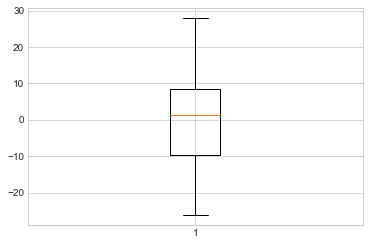

In [29]:
plt.boxplot(df.loc['2019-01-29':'2019-01-30'].value_hrf); 

---

In [34]:
df.loc['2019-01-30':'2019-01-30'].min()

value_hrf   -26.23
dtype: float64

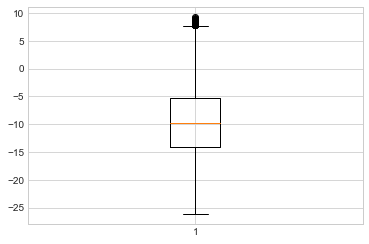

In [35]:
plt.boxplot(df.loc['2019-01-30':'2019-01-30'].value_hrf); 

In [37]:
df.to_csv('aot_temp_cleaned.csv', index=True)

# Create a three month dataset only:

In [38]:
df_3mo = df.loc['2019-01-01':'2019-03-31'].copy()

In [39]:
len(df_3mo)

12356626

In [53]:
df_3mo.to_csv('aot_temp_cleaned_3months.csv', index=True) 

In [43]:
import fastparquet

In [57]:
# df.to_parquet('aot_temp_cleaned.parquet', engine='fastparquet')

In [56]:
# pq = pd.read_parquet('aot_temp_cleaned.parquet', engine='fastparquet')
# pq.head(10)

In [46]:
len(pq)

120844393

In [47]:
len(pq)==len(df)

True

In [48]:
# df.to_parquet('aot_temp_cleaned.parquet', engine='fastparquet', compression="")
df.to_parquet('aot_temp_cleaned.parquet.gzip',  compression='gzip', engine='fastparquet')

# EXPORT THE CSV ZIPPED FORMAT...

In [69]:

df.to_csv('aot_temperatures.csv.gz', index=True, compression='gzip')


In [63]:
# test1 = pd.read_csv('https://wolverine-tomahawk.s3.us-east-2.amazonaws.com/aot_temp_cleaned_3months.csv')

In [68]:

# works:
# pd.read_csv('https://wolverine-tomahawk.s3.us-east-2.amazonaws.com/aot/sensors_data.csv')
    

# Testing the reading of parquet.gzip files from an external S3 source 

In [70]:

import fastparquet 
test3 = pd.read_parquet('https://wolverine-tomahawk.s3.us-east-2.amazonaws.com/aot/aot_temp_cleaned.parquet.gzip', 
                       engine='fastparquet')
# this should be the entire full every single thing dataset right (temp only)


In [77]:
test3.head(10)

,node_id,subsystem,sensor,parameter,value_hrf
timestamp,,,,,
2018-01-01 00:00:06,001e0610e532,metsense,pr103j2,temperature,12.38
2018-01-01 00:00:07,001e0610bc07,metsense,pr103j2,temperature,14.00
2018-01-01 00:00:07,001e0610ef27,metsense,pr103j2,temperature,12.56
2018-01-01 00:00:08,001e0610e540,metsense,pr103j2,temperature,11.93
2018-01-01 00:00:08,001e0610ee61,metsense,pr103j2,temperature,11.48
2018-01-01 00:00:14,001e0610fb4c,metsense,pr103j2,temperature,12.02
2018-01-01 00:00:20,001e0610ba18,metsense,pr103j2,temperature,10.85
2018-01-01 00:00:21,001e0610ba3b,metsense,pr103j2,temperature,14.72
2018-01-01 00:00:21,001e0610ba57,metsense,pr103j2,temperature,10.76


In [83]:
test3.tail()

,node_id,subsystem,sensor,parameter,value_hrf
timestamp,,,,,
2021-01-21 04:06:01,001e0610fb4c,metsense,pr103j2,temperature,33.44
2021-01-21 04:06:09,001e06113acb,metsense,pr103j2,temperature,25.61
2021-01-21 04:06:11,001e061183bf,metsense,pr103j2,temperature,33.98
2021-01-21 04:06:22,001e0610f05c,metsense,pr103j2,temperature,33.44
2021-01-21 04:06:22,001e0611804d,metsense,pr103j2,temperature,35.33


In [81]:
len(test3)   #  120 844 393, 120M rows :) 

120844393

In [82]:
test3.dtypes

node_id      category
subsystem    category
sensor       category
parameter    category
value_hrf     float64
dtype: object

---

In [71]:
# this below probably won't work...

In [ ]:

import awswrangler as wr

temp4 = wr.s3.read_parquet(path='s3://wolverine-tomahawk/aot/aot_temp_cleaned.parquet.gzip')
# , dataset=True)


In [ ]:

import awswrangler as wr

temp4 = wr.s3.read_parquet(path='s3://wolverine-tomahawk/aot_temp_cleaned.parquet.gzip')
# , dataset=True)


In [72]:

# import awswrangler as wr
# dfz = wr.s3.read_parquet(path='s3://wolverine-tomahawk/aot_temp_cleaned.parquet.gzip')


In [52]:

test1 = pd.read_parquet('s3://wolverine-tomahawk/aot_temp_cleaned.parquet', engine='fastparquet')


ValueError: Opening directories without a _metadata requiresa filesystem compatible with fsspec

In [ ]:

s3://wolverine-tomahawk/aot_temp_cleaned.parquet

    
    

<hr style="border:2px solid gray"> </hr>


<h1><center>STOP</center></h1>

<hr style="border:2px solid gray"> </hr>


In [ ]:
# %%notify -m "The cell has finished running"
# import time
# time.sleep(10)
# print('Finished!')

In [ ]:
# df[ df.node_id == '001e0610e532'].head(10)

In [ ]:
# len(df)  # 120 844 394

In [ ]:
# df.dtypes

In [ ]:
df.node_id.value_counts()

In [ ]:
print(df.node_id.unique())

In [ ]:
df.head(1)

In [ ]:
df.tail(2)

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace=True)

In [ ]:
len(df)

In [ ]:
df.isnull().sum()

In [ ]:
df.tail(1)

---
## EDA
---

In [ ]:
df.head()

In [ ]:
len(df.node_id.unique())  # not bad 

In [ ]:
# convert from C to F 
df.value_hrf = (df.value_hrf * (9/5)) + 32 

In [ ]:
df.head()

In [ ]:
# 6.6 GB -> 14.8 GB background (categoricals help alot)

In [ ]:
# data:  2018, 2019, 2020 (years)

In [ ]:
tdf = df.loc['2019-01-01':'2019-02-28'].copy()

In [ ]:
tdf.head(5)

In [ ]:
tdf.tail(5)

In [ ]:
len(tdf)  # 8 317 639

In [ ]:
sns.lineplot(x=tdf.index, 
             y="value_hrf",
             hue="node_id", 
             data=tdf)

In [ ]:
tdf['T'] = tdf.index

In [ ]:
tdf.head()

In [ ]:

ndf = tdf[tdf.node_id == '001e06113f54'].copy()

plt.figure(figsize=(19, 7))

sns.lineplot(x='T',  
             y="value_hrf",
             data=ndf, 
             linewidth=1, 
             linestyle='dashed')          
            
sns.despine(); 


In [ ]:
for u in tdf.node_id.unique():
    print(u)

In [ ]:

# ndf = tdf[tdf.node_id == '001e06113f54'].copy()

plt.figure(figsize=(19, 7))

sns.lineplot(x=tdf[tdf.node_id == '001e06113f54'].index, 
             y=tdf[tdf.node_id == '001e06113f54'].value_hrf, 
             linewidth=1, 
             linestyle='dashed')          
            
sns.despine(); 


In [ ]:

# sns.catplot(
#     data=tdf,
#     x='T', 
#     y='value_hrf', 
#     row='node_id',
#     col_wrap=4,
#     kind='point',
#     height=3, 
#     aspect=4,
#     color='blue') 


#### plot all of them one by one

In [ ]:

plt.style.use("dark_background")

small_window = list(tdf.node_id.unique())

for w in small_window:
    plt.figure(figsize=(16,4),dpi = 600)
    plt.grid(False)
    sns.lineplot( x = tdf[tdf.node_id == w].index, 
             y=tdf[tdf.node_id == w].value_hrf, 
             linewidth=.8,
             color='cyan')
    sns.despine()
    plt.xlabel(''),
    plt.ylabel('Temperature (C)')
    plt.title('node_id: = {}'.format(w))
    plt.tight_layout()
    plt.show()
        

In [ ]:
# sns.lineplot(x=tdf.index, 
#              y='value_hrf', 
#              data=tdf, 
#              linewidth=1, 
#              hue='node_id', 
#              linestyle='dashed').set(title='Time Series Plot')

# #rotate x-axis labels by 15 degrees
# plt.xticks(rotation=15)

# # boxplots by month
# sns.boxplot(x = 'month', y='Value', data = df)


# # boxplots by month
# sns.boxplot(x = 'month', y='Value', data = df)

```python

import pandas as pd
import multiprocessing as mp
from multiprocessing import Pool, cpu_count

def parallelize_dataframe(df, func, n_cores=12):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

```

In [ ]:
# # importing the module
# import matplotlib.pyplot as plt
  
# # plotting line within the given range
# plt.axhline(y = .5, xmin = 0.25, xmax = 0.9)
  
# # line colour is blue
# plt.axhline(y = 3, color = 'b', linestyle = ':')
  
# # line colour is white
# plt.axhline(y = 1, color = 'w', linestyle = '--')
  
# # line colour is red
# plt.axhline(y = 2, color = 'r', linestyle = 'dashed')    
    
# # adding axis labels    
# plt.xlabel('x - axis')
# plt.ylabel('y - axis')
  
# # displaying the plot
# plt.show()

---